# Proton Conducting Ceramic Electrolysis Cell (PCEC) Model Development to Study the effects of Electrolyte thickness on Ohmic Resistance and Faradaic efficiency.
This model consists of 3 layers of a PCEC:
 - A porous cermet negative electrode (Negatrode) of Ni and BCZYYb4411 (1mm thick)
 - A solid electrolyte consisting of BCZYYB4411 (5-25 microns thick)
 - A porous BCFZY positive electrode (positrode) (20 microns thick)
 
The solid portion of the anode is 60% NiO and 40% BCZYYb by mass. The mol fractions are: 14% BCZYYb and 86% Ni (the mol frac does not change after the Ni reduction

The electrolyte will vary from 5-25 microns in thickness

The electrolysis reaction that I will be modeling is: $H_\mathrm{2 (Neg,Gas)} + \frac{1}{2}O_\mathrm{2 (Pos,Gas)} \Longleftrightarrow H_2O_\mathrm{(Pos,Gas)}$

This simulation will run at a constant temperature of 550$^\circ$C with a constant flow of reactants and products of 100 SCCM each. For now I will assume that the gasses flow in at 550$^\circ$C
 - Negatrode Side: 5% $H_2$, 95%$N_2$
 - Positive Side: 10% Steam, 19% $O_2$, and 71% $N_2$.
A bias of -2V will applied to the cell to provide the driving force for the chemical reactions happening in reverse (aginst thermodynamics)

If I run the cell in fuel cell mode the gas composition will look like this:
 - Negatrode side 50% H2 50% N2
 - Positive Side: 10% Steam, 19% $O_2$, and 71% $N_2$.

The charge convention I will choose is that I will be tracking positive charges moving in and out of the three layers.  For example n on the negatrode side of the HER reaction is -1 because one positive charge leaves the anode.

# For now, I will just derive and code in my charge transfer equations:

## Assumptions to make my life easier:
 - I will do the charge transfer equations in Fuel Cell Mode (no bias applied).
 - I am going to assume that there are no transport limitations in the gas phase such that the gas phase concentrations are fixed.
 - I am going to asssume the sites are fixed
 - I am going to model each layer of the fuel cell as a node
 
# Charge Transfer Derivation:
 
### Final State Variables:
Negatrode
 - Hydrogen concentration on the Ni in the negatrode
 - Oxygen ion concentration on the electrolyte in the negatrode
 - water concentration on the Ni in the negatrode
 - proton concentration on the electrolyte in the negatrode
 - oxygen vacancy site concentration on the elyte surface in the negatrode
 - proton surface site concentration on the Ni in the negatrode
 - Equlibrium electric potential between the negatrode and the electrolyte
 
Electrolyte
 - Proton concentration in the electrolyte
 - Oxygen ion concentration in the electrolyte
 - Electric potential in the electrolyte
 
Positrode
 - proton concentration on the surface of on the positrode
 - Oxygen ion concentration on the positrode
 - water concentration on the surface of the positrode
 - surface reaction sites on the positrode
 - Oxygen concentration on the surface of the positrode
 - Equlibrium electric potential between the positrode and the electrolyte

## Negatrode
 
#### Reactions
Proton Half Cell Reaction:
 <center> $\mathrm{H_{Ni(s)}}+\mathrm{[]_{elyte(s)}}\Longleftrightarrow \mathrm{H^+_{elyte(surf)}} + \mathrm{e^-_{Ni}}+\left[\,\right]_\mathrm{Ni(s)}$</center>
 
Oxygen ion half cell reaction:
<center>$$\mathrm{O^{2-}_{elyte(s)} + 2\,H_{Ni(s)} \Longleftrightarrow \left[\,\right]_{elyte(s)} + H_2O_{Ni,(s)} + \left[\,\right]_{Ni(s)}+ 2\,e^-_{Ni(s)}  }$$ </center>

The Elyte reaction sites for the oxygen and the Hydrogen are same and are just oxygen sites on the surface.

### Charge Transfer Equations
I would like to find $\Delta\phi_\mathrm{int,neg}$.  To kick off the charge transfer process I will start by balenceing out the currents in the negatrode: $0 = i_\mathrm{ext}-i_\mathrm{far}-i_\mathrm{dl}$

<center>$i_\mathrm{dl} = i_\mathrm{ext}-i_\mathrm{far}$</center>

I can solve for $\Delta\phi_\mathrm{int,neg}$ using: $\Delta\phi_\mathrm{int,neg}=\frac{-i_\mathrm{dl,neg}}{C_\mathrm{dl,neg}}$
 - Where $C_\mathrm{dl,neg}$ is the capacitance at the negatrode/electrolyte interface.  This is also preset

For now $i_\mathrm{ext}$ will be pre-set, so to find $i_\mathrm{dl}$ I need to solve for $i_\mathrm{far}$ and to do so I will use mass action kinetics:

$i_\mathrm{ma}=nF(k_\mathrm{fwd}\prod_mC_\mathrm{ac,k}^{\nu^\prime_k}-k_\mathrm{rev}\prod_mC_\mathrm{ac,k}^{\nu^{\prime\prime}_k})$

Further expanding the equation:

$i_\mathrm{ma}=nF(k^*_\mathrm{fwd}\exp{(\frac{-\beta n_\mathrm{elec}F\Delta\phi}{RT})}\prod_mC_\mathrm{ac,k}^{\nu^\prime_k}-k^*_\mathrm{rev}\exp{(\frac{(1-\beta) n_\mathrm{elec}F\Delta\phi}{RT})}\prod_mC_\mathrm{ac,k}^{\nu^{\prime\prime}_k})$

## Solution vector variables from the negatrode
$$SV = \begin{bmatrix} \phi_\mathrm{int,neg} \\ C_\mathrm{H,surf,Ni} \\ C_\mathrm{H^+,surf,Ni} \\ C_{O^{2-},surf,Ni} \\ C_{H_2O,surf,Ni} \\ C_\mathrm{[],surf,Ni} \\ C_\mathrm{[],surf,elyte} \end{bmatrix}$$

### For now I will only use $\phi_\mathrm{int,neg}$ but later on I will track all of the concentrations (possibly $\theta$ instead).

## Positrode:
#### Reactions
Proton Half Cell Reaction:
 <center>$\mathrm{2H^+_{BCFZY(s)}}+2e^-_\mathrm{BCFZY}+\mathrm{O_{BCFZY(s)}}\Longleftrightarrow \mathrm{H_2O_{BCFZY(s)}} + \mathrm{[]_{BCFZY(s)}}$</center>
 
Oxygen ion half cell reaction:
<center>$$\mathrm{O_{(BCFZY)} + 2\,e^-_{BCFZY}\Longleftrightarrow \mathrm{O^{2-}_{BCFZY}} }$$ </center>

## Solution vector variables from the positrode
$$SV = \begin{bmatrix} \phi_\mathrm{int,pos} \\ C_\mathrm{H^+,surf,BCFZY} \\ C_{O^{2-},surf,BCFZY} \\ C_{H_2O,surf,BCFZY} \\ C_\mathrm{O,surf,BCFZY} \\ C_\mathrm{[],surf,BCFZY} \end{bmatrix}$$

### For now I will only use $\phi_\mathrm{int,pos}$ but later on I will track all of the concentrations (possibly $\theta$ instead).

# Current solution vector variables for the two electrode reactions
$$SV = \begin{bmatrix} \phi_\mathrm{int,neg} \\ C_\mathrm{H,surf,Ni} \\ C_\mathrm{H^+,surf,Ni} \\ C_{O^{2-},surf,Ni} \\ C_{H_2O,surf,Ni} \\ C_\mathrm{[],surf,Ni} \\ C_\mathrm{[],surf,elyte}\\ \phi_\mathrm{int,pos} \\ C_\mathrm{H^+,surf,BCFZY} \\ C_{O^{2-},surf,BCFZY} \\ C_{H_2O,surf,BCFZY} \\ C_\mathrm{O,surf,BCFZY} \\ C_\mathrm{[],surf,BCFZY} \end{bmatrix}$$

In [4]:
from scipy.integrate import solve_ivp
import numpy as np
from matplotlib import pyplot as plt
import math

#n_values: 
n_neg_p = -1
n_neg_o = -2
n_pos_p = 2
n_pos_o = 2

#Potentials (I will place in more accurate numbers later) #anode is the reference
phi_neg_0 = 0 #this will by my reference electrode
phi_elyte_0 = 0.5 # I will calculate more accurately later
phi_pos_0 = 1.05 # I will calculate more accurately later

dphi_int_neg_0 = phi_elyte_0-phi_neg_0 #Sets the applied potential on the cell\
dphi_int_pos_0 = phi_pos_0-phi_elyte_0

#beta values (need to also look up)
beta_o = 0.5 
beta_p = 0.5

#Physical Constants:
F = 96485 #C/mol e-
R = 8.314 #J/mol*K

#Equation values:
T = 823 #K

#Chemical parameters: (For these I just used yours, not sure where/how to find them) (I also kept hte positrode and negatrode values the same for now)
#Negatrode ORR
k_fwd_star_neg_o = 4.16307062e+1 # Chemical forward rate constant, m^4/mol^2/s
k_rev_star_neg_o = 4.0650045e-1 #Chemical reverse rate constant, m^4/mol^2/s
#Negatrode HER also neeed to look these up, but im assuming they are much faster than the oxide ones
k_fwd_star_neg_p = 4.16307062e+3 # Chemical forward rate constant, m^4/mol^2/s
k_rev_star_neg_p = 4.0650045e+1 #Chemical reverse rate constant, m^4/mol^2/s
#Positrode OER
k_fwd_star_pos_o = 4.16307062e+0 # Chemical forward rate constant, m^4/mol^2/s
k_rev_star_pos_o = 4.0650045e-2 #Chemical reverse rate constant, m^4/mol^2/s
#Positrode HRR also neeed to look these up, but im assuming they are much faster than the oxide ones
k_fwd_star_pos_p = 4.16307062e+2 # Chemical forward rate constant, m^4/mol^2/s
k_rev_star_pos_p = 4.0650045e+0 #Chemical reverse rate constant, m^4/mol^2/s


#Material Parameters
#BCZYYb4411 parameters:
ele_cond = 0.001 #1/(ohm*m) Need to look up this value so I just used yours
C_elyte = 46050    # Total (reference) elyte concentration, mol/m2 (I will calculate this at a later point)
D_k = np.array([7.46*10**-11,1.28*10**-12,0]) #(m^2/s) [Proton,Oxygen,Vacancy] Again I need to look these up so I used yours
#Nickle parameters:
C_Ni_s = 2.6e-05 #Surface site Concentrations mol/m^2 (again this is just from hw4)
#BCFZY parameters:

C_BCFZY = 46000 #mol/m^2 surface site concentration, I will look this up (If it is not known I will estimate it) likely it is similar to the elyte

#Concentrations/activities: I need to look these up so I used yours from HW4.
#Negatrode:
#Mol fractions (no units)
X_H_Ni = 0.6 #HW4
X_H2O_Ni = 0.2 #HW4
X_vac_Ni = 0.2 #HW4
X_Ox_elyte = 0.8 #I know this is 0.8
X_Hx_elyte = 0.1 #I am unsure of the split between Hx and oxygen vacancies
X_vac_elyte = 0.1 
#Activity Concentrations: (mol/m^2)
C_H_Ni = X_H_Ni*C_Ni_s
C_H2O_Ni = X_H2O_Ni*C_Ni_s
C_vac_Ni = X_vac_Ni*C_Ni_s
C_Hx_elyte = X_Hx_elyte*C_elyte
C_Ox_elyte = X_Ox_elyte*C_elyte
C_vac_elyte = X_vac_elyte*C_elyte

#Positrode:
#Mol fractions (no units) #I made these up, all I know is that 80% of the lattice sites:
X_Hx_BF = 0.05
X_H2O_BF = 0.05
X_vac_BF = 0.05
X_O_BF = 0.05
X_Ox_BF = 0.8
#Activity Concentrations: (mol/m^2)
C_Hx_BF = X_Hx_BF*C_BCFZY
C_H2O_BF = X_H2O_BF*C_BCFZY
C_vac_BF = X_vac_BF*C_BCFZY
C_O_BF = X_O_BF*C_BCFZY
C_Ox_BF = X_Ox_elyte*C_BCFZY

#geometric parameters:
#anode
eps_Ni = 0.455 #see calculations
eps_elyte_neg = 0.545 #See Calculations
r_Ni_neg = 1*10**-5 #(m)need to measure more accurately
r_elyte_neg = 5*10**-6 #(m) need to measure more acurately
r_int = 4*10**-6 #(m) need to measure more accurately, interface region between particles, on SEM images it looks almost like the radius
L_TPB = 2*math.pi*r_int
A_surf_Ni_neg = 4*math.pi*r_Ni_neg**2
A_surf_elyte_neg = 4*math.pi*r_elyte_neg**2
#Cathode
r_BCFZY = 500*10**-9 #(m) need to measure more accurately
A_surf_BCFZY = 4*math.pi*r_BCFZY**2
eps_BCFZY = 0.5 #just assuming 50% porosity need to look up this value

#Thermodynamic values (first 5 taken from homework 4, last one I had to make up)
g_H_Ni_o = -7.109209e+07      # standard-state gibbs energy for H adsorbed on Ni surface (J/kmol)
g_H2O_Ni_o = -3.97403035e+08  # standard-state gibbs energy for H2O adsorbed on Ni surface (J/kmol)
g_Vac_Ni_o = 0.0              # standard-state gibbs energy for Ni surface vacancy (J/kmol)
g_Vac_elyte_o = 0.0           # standard-state gibbs energy for electrolyte oxide vacancy (J/kmol)
g_Ox_elyte_o = -2.1392135e+08 # standard-state gibbs energy for electrolyte oxide O2- (J/kmol)
g_Hx_elyte_o = -2.1392135e+07 # standard-state gibbs energy for electrolyte protons H+ (J/kmol)

#Stoichiometric values:
#negatrode proton reaction:
nu_H_Ni_neg_p = -1
nu_vac_ely_neg_p = -1
nu_Hx_ely_neg_p = 1
nu_vac_Ni_neg_p = 1
#negatrode oxide reaction:
nu_H_Ni_neg_o = -2
nu_H2O_Ni_neg_o = 1
nu_vac_Ni_neg_o = 1
nu_vac_elyte_neg_o = 1
nu_Ox_elyte_neg_o = -1
#postirode proton reaction:
nu_Hx_BF_pos_p = -2
nu_O_BF_pos_p = -1
nu_H2O_BF_pos_p = 1
nu_vac_BF_pos_p = 1
#positrode oxide reaction:
nu_O_BF_pos_o = -1
nu_Ox_BF_pos_o = 1
nu_vac_BF_pos_o = 1

In [13]:
import numpy as np
from math import exp

i_ext = 40 #A
C_dl_neg = 6e5 # F/m2 this makes it so my function does not go to negative infinity
C_dl_pos = 2e2 # F/m2

def residual(t,SV):
    dSV_dt = np.zeros_like(SV) #initializing solution vector
    
    #Negatrode
    dphi_neg = SV[0]
    
    #MA Equations
    #4 product calculations:
    prod_fwd_neg_o = C_Ox_elyte**-nu_Ox_elyte_neg_o * C_H_Ni**-nu_H_Ni_neg_o  #- signs are needed to cancel out the sign convention of the stoichiometric coefficients
    prod_fwd_neg_p = C_H_Ni**-nu_H_Ni_neg_p * C_vac_Ni**-nu_vac_ely_neg_p
    prod_rev_neg_o = C_vac_elyte**nu_vac_elyte_neg_o * C_H2O_Ni**nu_H2O_Ni_neg_o * C_vac_Ni**nu_vac_Ni_neg_o
    prod_rev_neg_p = C_Hx_elyte**nu_Hx_ely_neg_p * C_vac_Ni**nu_vac_Ni_neg_p
    #reaction rates:
    #Final MA equations
    i_Far_neg_o = n_neg_o*F*(k_fwd_star_neg_o*math.exp((-beta_o*n_neg_o*F*dphi_neg)/(R*T))*prod_fwd_neg_o-k_rev_star_neg_o*math.exp(((1-beta_o)*n_neg_o*F*dphi_neg)/(R*T))*prod_rev_neg_o)
    i_Far_neg_p = n_neg_p*F*(k_fwd_star_neg_p*math.exp((-beta_p*n_neg_p*F*dphi_neg)/(R*T))*prod_fwd_neg_p-k_rev_star_neg_p*math.exp(((1-beta_p)*n_neg_p*F*dphi_neg)/(R*T))*prod_rev_neg_p)
    i_Far_neg = i_Far_neg_o + i_Far_neg_p
    
    i_dl_neg = i_ext - i_Far_neg
    ddphi_int_neg = -i_dl_neg/C_dl_neg
    dSV_dt[0] = ddphi_int_neg
    
    #-----Positrode
    dphi_pos = SV[1]
    
    #MA Equations
    #4 product calculations:
    prod_fwd_pos_o = C_O_BF**-nu_O_BF_pos_o #- signs are needed to cancel out the sign convention of the stoichiometric coefficients
    prod_fwd_pos_p = C_Hx_BF**-nu_Hx_BF_pos_p * C_O_BF**-nu_O_BF_pos_p
    prod_rev_pos_o = C_Ox_BF**nu_Ox_BF_pos_o
    prod_rev_pos_p = C_H2O_BF**nu_H2O_BF_pos_p * C_vac_BF**nu_vac_BF_pos_p
    
    #Final MA equations
    i_Far_pos_o = n_pos_o*F*(k_fwd_star_pos_o*math.exp((-beta_o*n_pos_o*F*dphi_pos)/(R*T))*prod_fwd_pos_o-k_rev_star_pos_o*math.exp(((1-beta_o)*n_pos_o*F*dphi_pos)/(R*T))*prod_rev_pos_o)
    i_Far_pos_p = n_pos_p*F*(k_fwd_star_pos_p*math.exp((-beta_p*n_pos_p*F*dphi_pos)/(R*T))*prod_fwd_pos_p-k_rev_star_pos_p*math.exp(((1-beta_p)*n_pos_p*F*dphi_pos)/(R*T))*prod_rev_pos_p)
    i_Far_pos = i_Far_pos_o + i_Far_pos_p
    
    fwd = math.exp((-beta_o*n_pos_o*F*dphi_pos)/(R*T))
    rev = math.exp(((1-beta_o)*n_pos_o*F*dphi_pos)/(R*T))
    print(fwd,rev)
    
    i_dl_pos = i_ext - i_Far_pos
    ddphi_int_pos = -i_dl_pos/C_dl_pos
    dSV_dt[1] = ddphi_int_pos
    
    return dSV_dt

0.000428358287155144 2334.4943473401677
0.0004764526246673903 2098.844561299449
0.000428358287155144 2334.4943473401677
0.000428358287155144 2334.4943473401677
0.00042835833665910483 2334.494077550352
0.0004283816501933153 2334.3670289068896
0.00042838164902095116 2334.3670352954177
0.00042840501216087113 2334.239730193652
0.0004284050108055321 2334.239737578454
0.00042863869873470124 2332.9671421453554
0.0004286385794156769 2332.9677915674483
0.0004288722753685548 2331.6965386504457
0.00042887213959142935 2331.6972768449427
0.000429562085921268 2327.952193116234
0.00042956214743725455 2327.951859738918
0.0004302521382156819 2324.218548098669
0.00043025209526769006 2324.2187801033947
0.00043094197922929407 2320.4979978706683
0.0004309419538726326 2320.4981344089692
0.0004327064575583863 2311.035535828737
0.00043270643973754096 2311.035631007831
0.0004344702306691716 2301.6536678699454
0.0004344702669911598 2301.6534754502477
0.00043623336881674414 2292.351001741196
0.000436233427263986

0.002060510411244588 485.316645110267
0.002060510411306451 485.3166450956963
0.0020605104113062735 485.3166450957381
0.0020605104113064544 485.31664509569543
0.0020605104113065186 485.3166450956803
0.0020605104113064544 485.31664509569543
0.0020605104113064583 485.3166450956946
0.0020605104113064544 485.31664509569543
0.002060510411306438 485.3166450956993
0.0020605104113064544 485.31664509569543
0.0020605104113064544 485.31664509569543
0.0020605104113064583 485.3166450956946
0.0020605104113064544 485.31664509569543
0.0020605104113064544 485.31664509569543
0.0020605104302962693 485.3166406229817
0.0020605104113064544 485.31664509569543
0.0020605104113064583 485.3166450956946
0.0020605104113064544 485.31664509569543
0.0020605104113064583 485.3166450956946
0.0020605104113064544 485.31664509569543
0.0020605104113064583 485.3166450956946
0.0020605104113064544 485.31664509569543
0.0020605104113064583 485.3166450956946
0.0020605104113064544 485.31664509569543
0.0020605104113064583 485.316645

0.0020605104113064544 485.31664509569543
0.0020605104113064583 485.3166450956946
0.0020605104113064544 485.31664509569543
0.0020605104113064583 485.3166450956946
0.0020605104113064544 485.31664509569543
0.0020605104113064544 485.31664509569543
0.00206051041130646 485.3166450956941
0.0020605104113064544 485.31664509569543
0.002060510411306451 485.3166450956963
0.0020605104113064544 485.31664509569543
0.0020605104113064583 485.3166450956946
0.0020605104113064544 485.31664509569543
0.002060510411306436 485.31664509569976
0.0020605104113064544 485.31664509569543
0.00206051041130646 485.3166450956941
0.0020605104113064544 485.31664509569543
0.0020605104113064305 485.316645095701
0.0020605104113064544 485.31664509569543
0.0020605104113064583 485.3166450956946
0.0020605104113064544 485.31664509569543
0.002060510411306451 485.3166450956963
0.0020605104113064544 485.31664509569543
0.00206051041130646 485.3166450956941
0.0020605104113064544 485.31664509569543
0.002060510411306438 485.31664509569

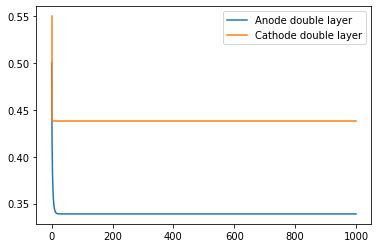

In [14]:
from scipy.integrate import solve_ivp
t_final = 1000 #seconds

SV_0 = np.array([dphi_int_neg_0, dphi_int_pos_0])

time_span = np.array([0,t_final])

solution = solve_ivp(residual,time_span,SV_0,rtol=1e-8, atol=1e-8,method = 'BDF') #BDF helps

for var in solution.y:
    plt.plot(solution.t,var)
    
plt.legend(['Anode double layer','Cathode double layer'])

# Future work:

#### Surface conservation equations for the Negatrode (finished)
Further Assumptions:
 - $C^\circ_{\rm Ni(s)} = \Gamma_{\rm Ni(s)}$ C has units of mol/m^2
 - $C^\circ_{\rm Elyte} = \Gamma_{\rm BCZYYb4411(s)}$
 
I am going to track $\theta_k$ for all species. Where $\theta_k=\frac{C_k}{\Gamma^\circ}$


On the surface the change in the mols of a species over time is equal to the generation rate of that species$\frac{dN_\mathrm{k,s}}{dt}=\mathrm{\dot{N}_{k,s,in}}-\mathrm{\dot{N}_{k,s,out}}+\mathrm{\dot{N}_{k,s,gen}}$. $\frac{dN_\mathrm{k,s}}{dt}$ has units of mol_k/s.   

Looking at the RHS of the above equation, there are two phenomena that cause species generation, they are the gas phase reactions (adsorption of Hydrogen) and the TPB reactions (protons and oxygen ions flowing into the electrolyte, and exorption of water). For the Hydrogen equation the first two terms are 0, but for the oxygen equation there is a non 0 $\mathrm{\dot{N}_{k,s,in}}$ term from oxygen ions flowing through the electrolyte to the surface. Oxide denotes fluxes from the oxide reaction, proton is from the protonic reaction, and gas denotes a gas phase reaction

<center>$\frac{dN_\mathrm{H,Ni}}{dt}=\mathrm{\dot{N}_{H,Ni,gen}} = \mathrm{\dot{s}_{H,Ni,gas}A_{surf,Ni}-(2\dot{s}_{H_2O,TPB,oxide}+\dot{s}_{H^+,elyte,TPB})L_\mathrm{TPB}}$ </center>

<center>$\frac{dN_\mathrm{H^+,elyte,surf}}{dt}=\mathrm{\dot{N}_{H^+,elyte,gen}} = \mathrm{\dot{s}_{H^+,elyte}L_\mathrm{TPB}}$ </center>

<center>$\frac{dN_\mathrm{O,elyte}}{dt}=\mathrm{\dot{N}_{O,elyte,diff}}+\mathrm{\dot{N}_{O,elyte,gen}} = \mathrm{J_{O^{-2},Elyte}A_\mathrm{surf,elyte}-\dot{s}_{H_2O,elyte,oxide}L_{TPB}}$ </center>

<center>$\frac{dN_\mathrm{[],elyte}}{dt}=\mathrm{\dot{N}_{[],elyte,gen}} = \mathrm{(\dot{s}_{[],elyte,oxide}-2\dot{s}_{[],elyte,proton})L_{TPB}}$ </center>

<center>$\frac{dN_\mathrm{[],Ni}}{dt}=\mathrm{\dot{N}_{[],Ni,gen}} = -\mathrm{(\dot{s}_{H,Ni,gas}+\dot{s}_{H_2O,Ni,gas})A_{surf,Ni}}+\mathrm{(\dot{s}_{[],Ni,oxide}+2\dot{s}_{[],Ni,proton})L_{TPB}}$ </center>

<center>$\frac{dN_\mathrm{H_2O,Ni}}{dt}=\mathrm{\dot{N}_{H_2O,Ni,gen}} = \mathrm{\dot{s}_{H_2O,Ni,oxide}L_{TPB}}-\mathrm{\dot{s}_{H_2O,Ni,gas}A_{surf,Ni}}$ </center>


Now looking dividing the whole equation by the surface area which makes the LHS $\frac{dC_\mathrm{k,s}}{dt}$(mol/m^2*s):

<center>$\frac{dC_\mathrm{H,Ni}}{dt}= \mathrm{\dot{s}_{H,Ni,gas}-(2\dot{s}_{H_2O,TPB,oxide}+\dot{s}_{H^+,elyte,TPB})\frac{L_\mathrm{TPB}}{A_{surf,Ni}}}$ </center>

<center>$\frac{dC_\mathrm{H^+,elyte,surf}}{dt}= \mathrm{\dot{s}_{H^+,elyte}\frac{L_\mathrm{TPB}}{A_{surf,elyte}}}$ </center>

<center>$\frac{dC_\mathrm{O,elyte}}{dt} = \mathrm{J_{O^{-2},Elyte}-\dot{s}_{H_2O,elyte,oxide}\frac{L_{TPB}}{A_{surf,elyte}}}$ </center>

<center>$\frac{dC_\mathrm{[],elyte}}{dt}= \mathrm{(\dot{s}_{[],elyte,oxide}-2\dot{s}_{[],elyte,proton})\frac{L_{TPB}}{A_{surf,elyte}}}$ </center>

<center>$\frac{dC_\mathrm{[],Ni}}{dt} = -\mathrm{(\dot{s}_{H,Ni,gas}+\dot{s}_{H_2O,Ni,gas})}+\mathrm{(\dot{s}_{[],Ni,oxide}+2\dot{s}_{[],Ni,proton})\frac{L_{TPB}}{A_{surf,Ni}}}$ </center>

<center>$\frac{dC_\mathrm{H_2O,Ni}}{dt} = \mathrm{\dot{s}_{H_2O,Ni,oxide}\frac{L_{TPB}}{A_{surf,Ni}}}-\mathrm{\dot{s}_{H_2O,Ni,gas}}$ </center>

Now dividing both sides by $\Gamma_\mathrm{\circ,surf}$ to convert C_k to $\theta_k$:

<center>$\frac{d\theta_\mathrm{H,Ni}}{dt}= \mathrm{\frac{\dot{s}_{H,Ni,gas}}{\Gamma_\mathrm{\circ,Ni}}-(2\dot{s}_{H_2O,TPB,oxide}+\dot{s}_{H^+,elyte,TPB})\frac{L_\mathrm{TPB}}{A_{surf,Ni}*\Gamma_\mathrm{\circ,Ni}}}$ </center>

<center>$\frac{d\theta_\mathrm{H^+,elyte,surf}}{dt}= \mathrm{\dot{s}_{H^+,elyte}\frac{L_\mathrm{TPB}}{A_{surf,elyte}*\Gamma_\mathrm{\circ,elyte}}}$ </center>

<center>$\frac{d\theta_\mathrm{O,elyte}}{dt} = \mathrm{\frac{J_{O^{-2},Elyte}}{\Gamma_\mathrm{\circ,elyte}}-\dot{s}_{H_2O,elyte,oxide}\frac{L_{TPB}}{A_{surf,elyte}*\Gamma_\mathrm{\circ,elyte}}}$ </center>

<center>$\frac{d\theta_\mathrm{[],elyte}}{dt}= \mathrm{(\dot{s}_{[],elyte,oxide}-2\dot{s}_{[],elyte,proton})\frac{L_{TPB}}{A_{surf,elyte}*\Gamma_\mathrm{\circ,elyte}}}$ </center>

<center>$\frac{d\theta_\mathrm{[],Ni}}{dt} = -\mathrm{(\dot{s}_{H,Ni,gas}+\dot{s}_{H_2O,Ni,gas})\frac{1}{\Gamma_\mathrm{\circ,Ni}}}+\mathrm{(\dot{s}_{[],Ni,oxide}+2\dot{s}_{[],Ni,proton})\frac{L_{TPB}}{A_{surf,Ni}*\Gamma_\mathrm{\circ,Ni}}}$ </center>

<center>$\frac{d\theta_\mathrm{H_2O,Ni}}{dt} = \mathrm{\dot{s}_{H_2O,Ni,oxide}\frac{L_{TPB}}{A_{surf,Ni*\Gamma_\mathrm{\circ,Ni}}}}-\mathrm{\dot{s}_{H_2O,Ni,gas}\frac{1}{\Gamma_\mathrm{\circ,Ni}}}$ </center>


For the charge transfer reactions, I will assume that these reactions are happening with in 20 microns of the electrolyte (the first 980 microns will be for gas transport only)
 - This will not effect this calculation, but will effect how I calculate $\Gamma$ in the future.

##### Calculating $\dot{s}$ for the TPB reactions:
$\dot{s}_\mathrm{k,m}=\frac{\nu_ki_\mathrm{far}}{nF}$
 - I am assuming that $\gamma$ is one so that $C_k = C_\mathrm{ac,k}$
 - I am also assuming there are no side reactions
 
In this case: (sign is baked into $\nu$)
 - $\dot{s}_\mathrm{H,Ni}=\frac{\nu_\mathrm{H,Ni}i_\mathrm{far,H}}{nF}+\frac{\nu_\mathrm{H,Ni}i_\mathrm{far,O}}{nF}$
 - $\dot{s}_\mathrm{H^+,elyte}=\frac{\nu_\mathrm{H^+,elyte}i_\mathrm{far,H}}{nF}$
 - $\dot{s}_\mathrm{O^{2-},Elyte}=\frac{\nu_\mathrm{O^{2-},elyte}i_\mathrm{far,O}}{nF}$
 - $\dot{s}_\mathrm{H_2O,Ni}=\frac{\nu_\mathrm{H_2O,Ni}i_\mathrm{far,O}}{nF}$
 - $\dot{s}_\mathrm{[],elyte}=\frac{\nu_\mathrm{[],elyte}i_\mathrm{far,H}}{nF}+\frac{\nu_\mathrm{[],elyte}i_\mathrm{far,O}}{nF}$
 - $\dot{s}_\mathrm{[],Ni}=\frac{\nu_\mathrm{[],Ni}i_\mathrm{far,H}}{nF}+\frac{\nu_\mathrm{[],Ni}i_\mathrm{far,O}}{nF}$

##### Calculating $\dot{s}$ for the gas phase reactions:
I will have to estimate the $\dot{s}$ for the gas phase reactions (also the oxygen flux coming through the electrolyte). The gas phase reactions for the anode are:
 - Hydrogen adsorbing onto the Ni: $\mathrm{H_{2,gas}+2[]_{surf,Ni}\Longleftrightarrow 2H_{surf,Ni}}$
 - Water desorbing from the Ni: $\mathrm{H_2O_{surf,Ni} \Longleftrightarrow H_2O_{gas}+[]_{surf,Ni}}$
 
$\dot{s}_\mathrm{k,surf}=\nu_k*\dot{q}$

Since these reactions are chemical reactions and not electrochemical reactions $k^*=k$.  Also since I am modeling these gasses as ideal gases, the activity of the gas is just the mol fraction thus, $C_\mathrm{ac,k} = X_k$.

 - $\dot{q}=k_\mathrm{fwd}\prod_mC_\mathrm{ac,k}^{\nu^\prime_k}-k_\mathrm{rev}\prod_mC_\mathrm{ac,k}^{\nu^{\prime\prime}_k}$

Here $\dot{q}$ is for the gas adsorption reactions. 

I coded in the negatrode gas adsorption reactions with the rest of the gas phase modeling (I didnt hash out the equations in the gas transport Jupyter notebook because I did so here

### I finished hashing out the conservation equations for the negatrode and just need to look up a bunch of values and implement the equations listed above.  Next I will need to do the same for the positrode.

## Positrode:
#### Reactions
Proton Half Cell Reaction:
 <center>$\mathrm{2H^+_{BCFZY(s)}}+2e^-_\mathrm{BCFZY}+\mathrm{O_{BCFZY(s)}}\Longleftrightarrow \mathrm{H_2O_{BCFZY(s)}} + \mathrm{[]_{BCFZY(s)}}$</center>
 
Oxygen ion half cell reaction:
<center>$$\mathrm{O_{(BCFZY)} + 2\,e^-_{BCFZY}\Longleftrightarrow \mathrm{O^{2-}_{BCFZY}} }$$ </center>

#### Surface conservation equations
Here again we are looking at conserving two different species.  However in this case, since BCFZY has mixed electron, proton, and oxygen ion conductivity, there is only one phase to study.  Both the protonic and the oxygen defects both rest on the surface oxygen sites in the lattice. There are chemical reactions happening on the surface of the BCFZY, there is one gas phase reaction which is oxygen adsorbing onto the BCFZY and there is the diffusion of protons from the electrolyte.

<center>$\frac{dN_\mathrm{O,BCFZY}}{dt}=\mathrm{\dot{N}_{O,BCFZY,gen}} = \mathrm{(\dot{s}_{O,BCFZY,gas}-\dot{s}_{O,BCFZY,proton}-\dot{s}_{O,BCFZY,oxide})A_{surf,BCFZY}}$ </center>

<center>$\frac{dN_\mathrm{Hx,BCFZY}}{dt}=\mathrm{\dot{N}_{Hx,BCFZY,gen}} = \mathrm{(J_{H_x, elyte}+\dot{s}_{Hx,BCFZY})A_{surf,BCFZY}}$ </center>

<center>$\frac{dN_\mathrm{H_2O,BCFZY}}{dt}=\mathrm{\dot{N}_{H_2O,BCFZY,gen}} = \mathrm{(\dot{s}_{H_2O,BCFZY,proton}-\dot{s}_{H_2O,BCFZY,gas})A_{surf,BCFZY}}$ </center>

<center>$\frac{dN_\mathrm{Ox,BCFZY}}{dt}=\mathrm{\dot{N}_{Ox,BCFZY,gen}} = \mathrm{(\dot{s}_{Ox,BCFZY,oxide}-J_{Ox,elyte,diffusion})A_{surf,BCFZY}}$ </center>

<center>$\frac{dN_\mathrm{[],BCFZY}}{dt}=\mathrm{\dot{N}_{[],BCFZY,gen}} = \mathrm{\dot{s}_{[],BCFZY,proton}A_{surf,BCFZY}}$ </center>

Now looking dividing the whole equation by the surface area which makes the LHS $\frac{dC_\mathrm{k,s}}{dt}$(mol/m^2*s):

<center>$\frac{dC_\mathrm{O,BCFZY}}{dt} = \mathrm{(\dot{s}_{O,BCFZY,gas}-\dot{s}_{O,BCFZY,proton}-\dot{s}_{O,BCFZY,oxide})}$ </center>

<center>$\frac{dC_\mathrm{Hx,BCFZY}}{dt} = \mathrm{J_{H_x,elyte}+\dot{s}_{Hx,BCFZY}}$ </center>

<center>$\frac{dC_\mathrm{H_2O,BCFZY}}{dt} = \mathrm{(\dot{s}_{H_2O,BCFZY,proton}-\dot{s}_{H_2O,BCFZY,gas})}$ </center>

<center>$\frac{dC_\mathrm{Ox,BCFZY}}{dt} = \mathrm{(\dot{s}_{Ox,BCFZY,oxide}-J_{Ox,elyte,diffusion})}$ </center>

<center>$\frac{dC_\mathrm{[],BCFZY}}{dt} = \mathrm{\dot{s}_{[],BCFZY,proton}}$ </center>

Now dividing both sides by $\Gamma_\mathrm{\circ,surf}$ to convert C_k to $\theta_k$:

<center>$\frac{d\theta_\mathrm{O,BCFZY}}{dt} = \mathrm{(\dot{s}_{O,BCFZY,gas}-\dot{s}_{O,BCFZY,proton}-\dot{s}_{O,BCFZY,oxide})*\frac{1}{\Gamma_\mathrm{\circ,surf,BCFZY}}}$ </center>

<center>$\frac{d\theta_\mathrm{Hx,BCFZY}}{dt} = \mathrm{(J_{H_x,elyte}+\dot{s}_{Hx,BCFZY})*\frac{1}{\Gamma_\mathrm{\circ,surf,BCFZY}}}$ </center>

<center>$\frac{d\theta_\mathrm{H_2O,BCFZY}}{dt} = \mathrm{(\dot{s}_{H_2O,BCFZY,proton}-\dot{s}_{H_2O,BCFZY,gas})*\frac{1}{\Gamma_\mathrm{\circ,surf,BCFZY}}}$ </center>

<center>$\frac{d\theta_\mathrm{Ox,BCFZY}}{dt} = \mathrm{(\dot{s}_{Ox,BCFZY,oxide}-J_{Ox,elyte,diffusion})*\frac{1}{\Gamma_\mathrm{\circ,surf,BCFZY}}}$ </center>

<center>$\frac{d\theta_\mathrm{[],BCFZY}}{dt} = \mathrm{\dot{s}_{[],BCFZY,proton}*\frac{1}{\Gamma_\mathrm{\circ,surf,BCFZY}}}$ </center>



##### Calculating $\dot{s}$ for the TPB reactions:
$\dot{s}_\mathrm{k,m}=\frac{\nu_ki_\mathrm{far}}{nF}$
 - I am assuming that $\gamma$ is one so that $C_k = C_\mathrm{ac,k}$
 - I am also assuming there are no side reactions
 
In this case: (sign is baked into $\nu$)
 - $\dot{s}_\mathrm{O,BCFZY}=\frac{\nu_\mathrm{O,BCFZY,P}i_\mathrm{far,P}}{nF}+\frac{\nu_\mathrm{O,BCFZY,O}i_\mathrm{far,O}}{nF}$
 - $\dot{s}_\mathrm{H^+,BCFZY}=\frac{\nu_\mathrm{H^+,BCFZY,P}i_\mathrm{far,P}}{nF}$
 - $\dot{s}_\mathrm{O^{2-},BCFZY,O}=\frac{\nu_\mathrm{O^{2-},BCFZY}i_\mathrm{far,O}}{nF}$
 - $\dot{s}_\mathrm{H_2O,BCFZY}=\frac{\nu_\mathrm{H_2O,BCFZY,P}i_\mathrm{far,P}}{nF}$
 - $\dot{s}_\mathrm{[],BCFZY}=\frac{\nu_\mathrm{[],elyte,P}i_\mathrm{far,H}}{nF}$

##### Calculating $\dot{s}$ for the gas phase reactions:
I will have to estimate the $\dot{s}$ for the gas phase reactions (also the oxygen flux coming through the electrolyte). The gas phase reactions for the anode are:
 - Oxyen adsorbing onto the Ni: $\mathrm{O_{2,gas}+2[]_{surf,BCFZY}\Longleftrightarrow 2H_{surf,BCFZY}}$
 - Water desorbing from the BCFZY:$\mathrm{H_2O_{surf,BCFZY} \Longleftrightarrow H_2O_{gas}+[]_{surf,BCFZY}}$
 
$\dot{s}_\mathrm{k,surf}=\nu_k*\dot{q}$
 - $\dot{q}=k_\mathrm{fwd}\prod_mC_\mathrm{ac,k}^{\nu^\prime_k}-k_\mathrm{rev}\prod_mC_\mathrm{ac,k}^{\nu^{\prime\prime}_k}$

Here $\dot{q}$ is for the gass adsorption reactions